# Formulas;

# Stochastic Gradient Descent (SGD)
$$
\theta = \theta - \eta \nabla J(\theta)
$$

# Adam
$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla J(\theta)
$$
$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) (\nabla J(\theta))^2
$$
$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$
$$
\theta = \theta - \eta \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
$$

# RMSprop
$$
v_t = \beta v_{t-1} + (1 - \beta) (\nabla J(\theta))^2
$$
$$
\theta = \theta - \eta \frac{\nabla J(\theta)}{\sqrt{v_t} + \epsilon}
$$

# Adagrad
$$
G_{t,i} = \sum_{\tau=1}^t g_{\tau,i}^2
$$
$$
\theta_{t,i} = \theta_{t-1,i} - \frac{\eta}{\sqrt{G_{t,i} + \epsilon}} g_{t,i}
$$

# Adadelta
$$
E[g^2]_t = \rho E[g^2]_{t-1} + (1 - \rho) g_t^2
$$
$$
\Delta\theta_t = - \frac{\sqrt{E[\Delta \theta^2]_{t-1} + \epsilon}}{\sqrt{E[g^2]_t + \epsilon}} g_t
$$
$$
\theta_{t+1} = \theta_t + \Delta\theta_t
$$


## Import

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

## Initial condition

In [101]:
T = 0.1
L = 1.0
alpha = 0.01
Nx = 50
Nt = 100
dx = L / (Nx - 1)
dt = T / Nt
learning_rate = 0.001
num_epochs = 500
noise_level = 0.05
t1 = 0.1
num_samples = 100

## Our Grid

In [102]:
x = np.linspace(0, L, Nx)
x

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

## Our function

In [103]:
u0 = np.sin(np.pi * x)
u0

array([0.00000000e+00, 6.40702200e-02, 1.27877162e-01, 1.91158629e-01,
       2.53654584e-01, 3.15108218e-01, 3.75267005e-01, 4.33883739e-01,
       4.90717552e-01, 5.45534901e-01, 5.98110530e-01, 6.48228395e-01,
       6.95682551e-01, 7.40277997e-01, 7.81831482e-01, 8.20172255e-01,
       8.55142763e-01, 8.86599306e-01, 9.14412623e-01, 9.38468422e-01,
       9.58667853e-01, 9.74927912e-01, 9.87181783e-01, 9.95379113e-01,
       9.99486216e-01, 9.99486216e-01, 9.95379113e-01, 9.87181783e-01,
       9.74927912e-01, 9.58667853e-01, 9.38468422e-01, 9.14412623e-01,
       8.86599306e-01, 8.55142763e-01, 8.20172255e-01, 7.81831482e-01,
       7.40277997e-01, 6.95682551e-01, 6.48228395e-01, 5.98110530e-01,
       5.45534901e-01, 4.90717552e-01, 4.33883739e-01, 3.75267005e-01,
       3.15108218e-01, 2.53654584e-01, 1.91158629e-01, 1.27877162e-01,
       6.40702200e-02, 1.22464680e-16])

## Euler method:

u<sub>n + 1, i</sub> = u<sub>n, i</sub> + alpha * (dt / dx^2^) * (u<sub>n, i - 1</sub> - 2 * u<sub>n, i</sub> + u<sub>n, i + 1</sub>)


In [104]:
def euler(u, alpha, dx, dt):
    for n in range(0, Nt - 1):
        u[n + 1, 1:-1] = u[n, 1:-1] + alpha * dt / dx**2 * (u[n, 2:] - 2 * u[n, 1:-1] + u[n, :-2])
    return u

## Solving

In [105]:
u = np.zeros((Nt, Nx))
u[0, :] = u0
u

array([[0.00000000e+00, 6.40702200e-02, 1.27877162e-01, ...,
        1.27877162e-01, 6.40702200e-02, 1.22464680e-16],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [106]:
u = euler(u, alpha, dx, dt)
u

array([[0.00000000e+00, 6.40702200e-02, 1.27877162e-01, ...,
        1.27877162e-01, 6.40702200e-02, 1.22464680e-16],
       [0.00000000e+00, 6.40638987e-02, 1.27864545e-01, ...,
        1.27864545e-01, 6.40638987e-02, 0.00000000e+00],
       [0.00000000e+00, 6.40575780e-02, 1.27851930e-01, ...,
        1.27851930e-01, 6.40575780e-02, 0.00000000e+00],
       ...,
       [0.00000000e+00, 6.34599476e-02, 1.26659125e-01, ...,
        1.26659125e-01, 6.34599476e-02, 0.00000000e+00],
       [0.00000000e+00, 6.34536864e-02, 1.26646628e-01, ...,
        1.26646628e-01, 6.34536864e-02, 0.00000000e+00],
       [0.00000000e+00, 6.34474260e-02, 1.26634133e-01, ...,
        1.26634133e-01, 6.34474260e-02, 0.00000000e+00]])

## Take the all the data where time is equal to 0.1

In [107]:
# data_t1 = u[int(t1 / dt), :]
# data_t1

In [108]:
index = min(int(0.1 / dt), Nt - 1)
data_t1 = u[index, :]
data_t1

array([0.        , 0.06344743, 0.12663413, 0.18930047, 0.25118894,
       0.31204521, 0.37161923, 0.42966618, 0.48594754, 0.54023203,
       0.5922966 , 0.6419273 , 0.68892017, 0.73308213, 0.7742317 ,
       0.81219978, 0.84683036, 0.87798113, 0.90552408, 0.92934605,
       0.94934913, 0.96545113, 0.97758589, 0.98570354, 0.98977072,
       0.98977072, 0.98570354, 0.97758589, 0.96545113, 0.94934913,
       0.92934605, 0.90552408, 0.87798113, 0.84683036, 0.81219978,
       0.7742317 , 0.73308213, 0.68892017, 0.6419273 , 0.5922966 ,
       0.54023203, 0.48594754, 0.42966618, 0.37161923, 0.31204521,
       0.25118894, 0.18930047, 0.12663413, 0.06344743, 0.        ])

## Add some noise

In [109]:
data_t1_noisy = data_t1 + noise_level * np.random.normal(size=data_t1.shape)
data_t1_noisy

array([ 0.04063409, -0.02636691,  0.17550313,  0.18219771,  0.22718292,
        0.37425821,  0.33831927,  0.43600435,  0.45261335,  0.56622533,
        0.57921856,  0.57685801,  0.73230075,  0.73446376,  0.76087718,
        0.78110275,  0.93091862,  0.8892878 ,  0.89063388,  0.92356754,
        0.97334353,  0.95389529,  0.91763608,  1.00485997,  0.97496018,
        0.94715484,  1.01706381,  0.92356237,  0.94633399,  0.98679359,
        1.01349884,  0.83266786,  0.76653255,  0.88029713,  0.84698756,
        0.70958625,  0.73394784,  0.6755683 ,  0.71315017,  0.57015728,
        0.53196341,  0.47244059,  0.41616115,  0.37872138,  0.31264867,
        0.24539208,  0.17922044,  0.12677477,  0.10288322, -0.02845955])

## Training data

In [110]:
X_train = np.array([data_t1_noisy + noise_level * np.random.normal(size=data_t1_noisy.shape) for _ in range(num_samples)])
y_train = np.array([u0 for _ in range(num_samples)])

In [111]:
X_train = X_train.reshape(num_samples, Nx, 1)
X_train

array([[[ 0.02905639],
        [-0.03703338],
        [ 0.14683495],
        ...,
        [ 0.06280666],
        [ 0.03277366],
        [ 0.05826127]],

       [[ 0.17694171],
        [-0.14087335],
        [ 0.20485836],
        ...,
        [ 0.20718231],
        [ 0.09695677],
        [-0.07768475]],

       [[ 0.01328604],
        [ 0.02045062],
        [ 0.05310247],
        ...,
        [ 0.09810006],
        [ 0.10399244],
        [-0.02483354]],

       ...,

       [[-0.02077226],
        [-0.03784182],
        [ 0.10585276],
        ...,
        [ 0.11591113],
        [ 0.0901017 ],
        [ 0.03003942]],

       [[ 0.08426547],
        [-0.03516883],
        [ 0.21409548],
        ...,
        [ 0.20959448],
        [ 0.02886519],
        [-0.07423183]],

       [[ 0.03067299],
        [-0.01016202],
        [ 0.1513348 ],
        ...,
        [ 0.16704304],
        [ 0.12909977],
        [-0.02041223]]])

In [112]:
y_train = y_train.reshape(num_samples, Nx, 1)
y_train

array([[[0.00000000e+00],
        [6.40702200e-02],
        [1.27877162e-01],
        ...,
        [1.27877162e-01],
        [6.40702200e-02],
        [1.22464680e-16]],

       [[0.00000000e+00],
        [6.40702200e-02],
        [1.27877162e-01],
        ...,
        [1.27877162e-01],
        [6.40702200e-02],
        [1.22464680e-16]],

       [[0.00000000e+00],
        [6.40702200e-02],
        [1.27877162e-01],
        ...,
        [1.27877162e-01],
        [6.40702200e-02],
        [1.22464680e-16]],

       ...,

       [[0.00000000e+00],
        [6.40702200e-02],
        [1.27877162e-01],
        ...,
        [1.27877162e-01],
        [6.40702200e-02],
        [1.22464680e-16]],

       [[0.00000000e+00],
        [6.40702200e-02],
        [1.27877162e-01],
        ...,
        [1.27877162e-01],
        [6.40702200e-02],
        [1.22464680e-16]],

       [[0.00000000e+00],
        [6.40702200e-02],
        [1.27877162e-01],
        ...,
        [1.27877162e-01],
        [6.4070

## Optimizer's list

In [113]:
optimizers_list = [
    optimizers.SGD(learning_rate=0.001),
    optimizers.Adam(learning_rate=0.001),
    optimizers.RMSprop(learning_rate=0.001),
    optimizers.Adagrad(learning_rate=0.001),
    optimizers.Adadelta(learning_rate=0.001)
]

optimizer_names = ['SGD', 'Adam', 'RMSprop', 'Adagrad', 'Adadelta']

## CNN Model

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - loss: 0.4948 - val_loss: 0.4932
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.4924 - val_loss: 0.4907
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.4900 - val_loss: 0.4884
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.4876 - val_loss: 0.4860
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.4852 - val_loss: 0.4836
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.4828 - val_loss: 0.4812
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.4805 - val_loss: 0.4789
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4782 - val_loss: 0.4765
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.4758 - val_loss: 0.4742
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.4734 - val_loss: 0.4719
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.4712 - val_loss: 0.4696
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.4688 - val_loss: 0.4673


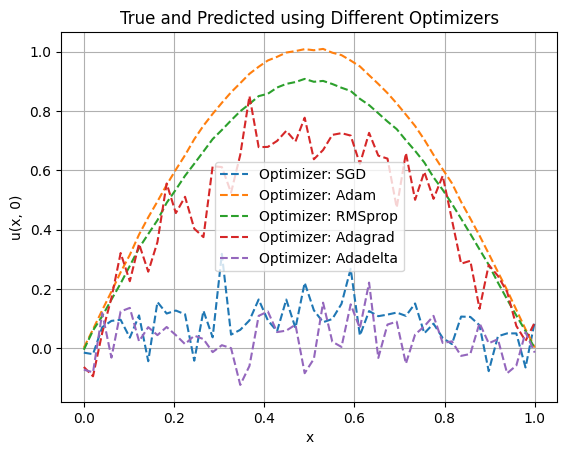

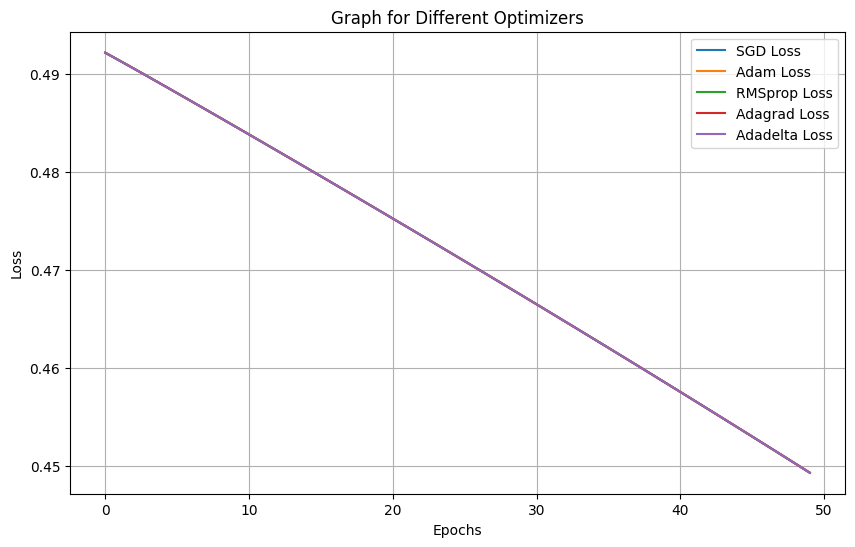

In [114]:
for i, opt in enumerate(optimizers_list):

    model = models.Sequential([
        layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(Nx, 1)),
        layers.Conv1D(64, kernel_size=3, activation='relu'),
        layers.Conv1D(128, kernel_size=3, activation='relu'),
        layers.Flatten(),
        layers.Dense(Nx)
    ])

    # different oprtimizers
    model.compile(optimizer=opt, loss='mse')

    history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)
    predicted_initial_condition = model.predict(X_train)[0]

    plt.plot(x, predicted_initial_condition, label=f'Optimizer: {optimizer_names[i]}', linestyle='--')
    plt.legend()

plt.xlabel('x')
plt.ylabel('u(x, 0)')
plt.title('True and Predicted using Different Optimizers')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for i, opt in enumerate(optimizers_list):
    plt.plot(history.history['loss'], label=f'{optimizer_names[i]} Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Graph for Different Optimizers')
plt.legend()
plt.grid(True)
plt.show()

## Ploting